# Keras Clasificación binaria

# 1.Importación librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importación fuente de datos

In [25]:
#Lectura datos históricos
df = pd.read_csv('./info_prestamos.csv',encoding = "ISO-8859-1",delimiter=',')

In [26]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


# 3.Análisis de Datos (EDA) + Preprocesado

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138950 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [37]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


## 3.1 Limpieza inicial

In [29]:
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25359
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [30]:
#Eliminar variables que tienen un alto porcentaje de registros con el valor nulo
df_var = df.isnull().sum() #Creamos una serie de pandas con el número de valores nulos de cada variable
porcentaje_eliminacion = 0.2 #20%
df_var = df_var[df_var<porcentaje_eliminacion*len(df)] #Nos quedamos con las variables que tienen menos de un porcentaje de registros nulos
lista_variables_OK = df_var.index #Nos quedamos con el índice de la serie (los nombres de las variables de interés)
df = df[lista_variables_OK] #Filtramos el dataframe original y nos quedamos solo con las columnas de interés
df.head(5)

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [31]:
#Registros que tienen algún valor erróneo --> Eliminar / Interpolar / Correlar con otras variables para asignar el promedio en base a la variable con mayor correlación
#df.dropna(inplace=True)
df.isnull().sum() #Verificamos si hay valores nulos en alguna columna del dataframe

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed           7371
Home_Owner               25359
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [32]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164309.0,1.008216e+07,47432.067027,10000001.0,10041078.00,10082155.00,10123232.00,10164309.00
Annual_Income,139207.0,7.333116e+04,60377.498294,4000.0,45000.00,63000.00,88697.50,7500000.00
Debt_To_Income,164309.0,1.720719e+01,7.845083,0.0,11.37,16.84,22.78,39.99
Inquiries_Last_6Mo,164309.0,7.816979e-01,1.034747,0.0,0.00,0.00,1.00,8.00
Number_Open_Accounts,164309.0,1.119382e+01,4.991813,0.0,8.00,10.00,14.00,76.00
Total_Accounts,164309.0,2.506767e+01,11.583067,2.0,17.00,23.00,32.00,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.00,3.00,3.00


In [38]:
# TRANSFORMAR VARIABLE "Length_Employed"
df["Length_Employed"].unique()

array([ 0.,  4.,  7.,  8.,  2., 10.,  1., nan,  6.,  9.,  3.,  5.])

In [34]:
df['Length_Employed'] = df['Length_Employed'].str.replace('< 1 year','0 years') #Sustituimos <1 año por 0 para diferenciar de la categoría 1 año
df['Length_Employed'] = df["Length_Employed"].str.extract('(\d+)') # Nos quedamos únicamente con los carácteres numéricos
df["Length_Employed"] = df["Length_Employed"].apply(pd.to_numeric,errors='coerce') # Convertimos la columna a formato número
df["Length_Employed"]

0          0.0
1          4.0
2          7.0
3          0.0
4          8.0
          ... 
164304    10.0
164305     8.0
164306    10.0
164307     4.0
164308    10.0
Name: Length_Employed, Length: 164309, dtype: float64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164309 non-null  int64  
 1   Loan_Amount_Requested  164309 non-null  object 
 2   Length_Employed        156938 non-null  float64
 3   Home_Owner             138950 non-null  object 
 4   Annual_Income          139207 non-null  float64
 5   Income_Verified        164309 non-null  object 
 6   Purpose_Of_Loan        164309 non-null  object 
 7   Debt_To_Income         164309 non-null  float64
 8   Inquiries_Last_6Mo     164309 non-null  int64  
 9   Number_Open_Accounts   164309 non-null  int64  
 10  Total_Accounts         164309 non-null  int64  
 11  Gender                 164309 non-null  object 
 12  Interest_Rate          164309 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 16.3+ MB


In [39]:
# Limpiamos los valores erróneos de Length_Employed a partir de la correlación con otras variables
print("Correlación con Length_Employed")
df.corr(numeric_only = True)['Length_Employed'].sort_values()

Correlación con Length_Employed


Inquiries_Last_6Mo     -0.006522
Loan_ID                 0.000152
Interest_Rate           0.030404
Number_Open_Accounts    0.037321
Debt_To_Income          0.049020
Annual_Income           0.069505
Total_Accounts          0.111460
Length_Employed         1.000000
Name: Length_Employed, dtype: float64

In [44]:
#La mayor correlación se da con Total_Accounts por tanto completaremos los valores nulos de Length_Employed con el valor promedio de total_accounts para cada categoría de Length_employed
print("Promedio de Length_Employed por Total_Accounts")
df.groupby('Total_Accounts')['Length_Employed'].mean()

Promedio de Length_Employed por Total_Accounts


Total_Accounts
2       2.500000
3       2.709924
4       3.662551
5       4.180240
6       4.260575
         ...    
99     10.000000
102     7.000000
105    10.000000
116    10.000000
156    10.000000
Name: Length_Employed, Length: 100, dtype: float64

In [46]:
total_acc_avg = df.groupby('Total_Accounts')['Length_Employed'].mean()

In [47]:
total_acc_avg[5]

np.float64(4.180240320427236)

In [48]:
def completar_len_empl(total_acc,len_emp):
    if np.isnan(len_emp):
        return total_acc_avg[total_acc] #Si el valor es nulo devuelve el promedio de Length_Employed para el valor correspondiente de Total_Accounts
    else:
        return len_emp

In [49]:
df['Length_Employed'] = df.apply(lambda x: completar_len_empl(x['Total_Accounts'], x['Length_Employed']), axis=1)

In [50]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner               25359
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [51]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [52]:
# TRANSFORMAR VARIABLE "Home_Owner"
df["Home_Owner"].value_counts()

Home_Owner
Mortgage    70345
Rent        56031
Own         12525
Other          49
Name: count, dtype: int64

In [54]:
df.groupby("Home_Owner").mean(numeric_only=True)

,Loan_ID,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Interest_Rate
Home_Owner,,,,,,,,
Mortgage,1.008211e+07,6.673973,83699.371184,17.144232,0.840387,11.860672,27.669188,2.112673
Other,1.007884e+07,4.818072,64540.743590,14.535306,0.938776,9.306122,23.530612,2.081633
Own,1.008211e+07,6.189912,66104.826361,17.824458,0.768782,10.967186,24.343792,2.170299
Rent,1.008234e+07,5.081681,62077.534637,17.124675,0.708322,10.425158,22.021060,2.213382


<Axes: xlabel='Home_Owner'>

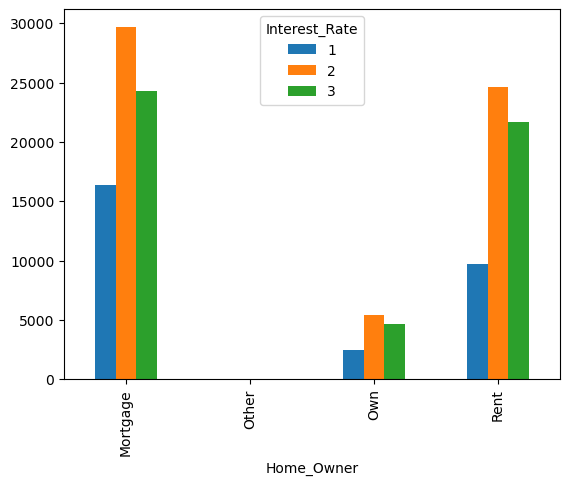

In [55]:
#Calculamos la distribución de los valores de Interest_Rate vs los valores de Home_Owner
df.pivot_table(index="Home_Owner", columns="Interest_Rate", values="Loan_ID", aggfunc="count").plot(kind="bar")

In [56]:
#Sobre el total la tasa de interés (Interest_Rate) = 3 supone un mayor porcentaje cuando "Home_Owner" = "Rent" que en el resto de categorías de "Home_Owner", por tanto si Interest_rate = 3 completaremos los valores nulos con "Rent"
#"Home_Owner" = "Mortgage" tiene un peso muy alto sobre el total de registros, por tanto si Interest_rate = 1 o 2 completaremos los valores nulos con "Mortage"
def completar_home_owner(home_owner,int_rate):
    if home_owner=='':
        if int_rate == 3:
            return "Rent"
        else:
            return "Mortgage" #En caso de que Interest_Rate = 1 / 2
    else:
        return home_owner

In [57]:
df['Home_Owner'] = df['Home_Owner'].replace(np.nan, '')

In [58]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [59]:
df.isnull().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner                   0
Annual_Income            25102
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
dtype: int64

In [60]:
df['Home_Owner'] = df.apply(lambda x: completar_home_owner(x['Home_Owner'], x['Interest_Rate']), axis=1)

In [61]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.0,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,Rent,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


(array([1.17229e+05, 1.97800e+04, 1.62000e+03, 3.19000e+02, 1.29000e+02,
        4.80000e+01, 1.90000e+01, 2.20000e+01, 1.50000e+01, 8.00000e+00]),
 array([  4000. , 103599.9, 203199.8, 302799.7, 402399.6, 501999.5,
        601599.4, 701199.3, 800799.2, 900399.1, 999999. ]),
 <BarContainer object of 10 artists>)

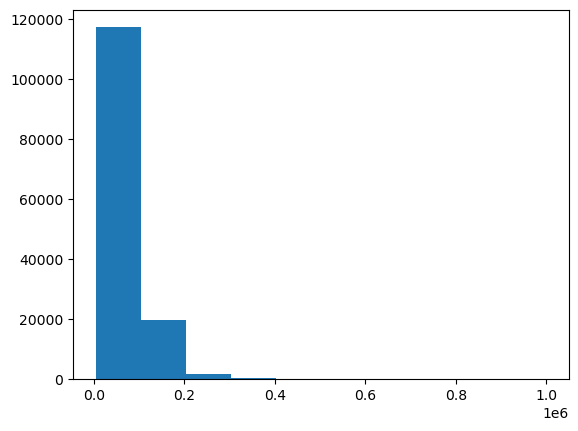

In [62]:
# TRANSFORMAR VARIABLE "Annual_Income"
df_aux = df[df["Annual_Income"]<1000000]
plt.hist(df_aux["Annual_Income"],bins=10)

In [63]:
# Limpiamos los valores erróneos de Annual_income a partir de la correlación con otras variables
print("Correlación con Annual_Income")
df.corr(numeric_only = True)['Annual_Income'].sort_values()

Correlación con Annual_Income


Debt_To_Income         -0.173589
Interest_Rate          -0.052783
Loan_ID                 0.008326
Inquiries_Last_6Mo      0.060011
Length_Employed         0.070139
Number_Open_Accounts    0.145822
Total_Accounts          0.203237
Annual_Income           1.000000
Name: Annual_Income, dtype: float64

In [65]:
total_acc_inc_avg = df.groupby('Total_Accounts')['Annual_Income'].mean()
total_acc_inc_avg

Total_Accounts
2       88617.400000
3       36087.616140
4       44522.606276
5       45691.847537
6       47686.809039
           ...      
99      97000.000000
102              NaN
105     38000.000000
116    240000.000000
156     42000.000000
Name: Annual_Income, Length: 100, dtype: float64

In [66]:
def completar_an_inc(total_acc,an_inc):
    if np.isnan(an_inc):
        return total_acc_inc_avg[total_acc] #Si el valor es nulo devuelve el promedio de Length_Employed para el valor correspondiente de Total_Accounts
    else:
        return an_inc

df['Annual_Income'] = df.apply(lambda x: completar_an_inc(x['Total_Accounts'], x['Annual_Income']), axis=1)

df.isnull().sum()

Loan_ID                  0
Loan_Amount_Requested    0
Length_Employed          0
Home_Owner               0
Annual_Income            1
Income_Verified          0
Purpose_Of_Loan          0
Debt_To_Income           0
Inquiries_Last_6Mo       0
Number_Open_Accounts     0
Total_Accounts           0
Gender                   0
Interest_Rate            0
dtype: int64

In [67]:
df[df['Annual_Income'].isnull()] #Ha quedado un registro sin completar

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
86968,10086969,"24,000",7.0,Mortgage,NaN,VERIFIED - income,home_improvement,19.51,0,10,102,Male,3


In [68]:
total_acc_inc_avg[102]

np.float64(nan)

In [69]:
#Eliminamos ese registro
df.dropna(inplace=True)

In [70]:
df.info() #Hemos desechado 1 registro y no hay nulos

<class 'pandas.core.frame.DataFrame'>
Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  object 
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  int64  
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 17.5+ MB


In [71]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",0.0,Rent,68000.00000,not verified,car,18.37,0,9,14,Female,1
1,10000002,"30,000",4.0,Mortgage,73993.44661,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,"24,725",7.0,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,"16,000",0.0,Rent,56160.00000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,"17,000",8.0,Own,96000.00000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [72]:
#TRANSFORMAR TIPO Loan_Amount_Requested
df['Loan_Amount_Requested'] = df['Loan_Amount_Requested'].str.replace(",","").apply(pd.to_numeric)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  int64  
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  int64  
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 17.5+ MB


In [74]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164308.0,1.008215e+07,47432.209880,10000001.0,10041077.75,10082154.50,1.012323e+07,10164309.00
Loan_Amount_Requested,164308.0,1.434928e+04,8281.859681,500.0,8000.00,12075.00,2.000000e+04,35000.00
Length_Employed,164308.0,5.990712e+00,3.548372,0.0,3.00,6.00,1.000000e+01,10.00
Annual_Income,164308.0,7.332921e+04,55796.901118,4000.0,48000.00,65000.00,8.560164e+04,7500000.00
Debt_To_Income,164308.0,1.720718e+01,7.845104,0.0,11.37,16.84,2.278000e+01,39.99
Inquiries_Last_6Mo,164308.0,7.817027e-01,1.034748,0.0,0.00,0.00,1.000000e+00,8.00
Number_Open_Accounts,164308.0,1.119383e+01,4.991828,0.0,8.00,10.00,1.400000e+01,76.00
Total_Accounts,164308.0,2.506720e+01,11.581547,2.0,17.00,23.00,3.200000e+01,156.00
Interest_Rate,164308.0,2.158945e+00,0.738363,1.0,2.00,2.00,3.000000e+00,3.00


## 3.2 Visualización

### 3.2.1 Plots básicos

<Axes: xlabel='Interest_Rate', ylabel='count'>

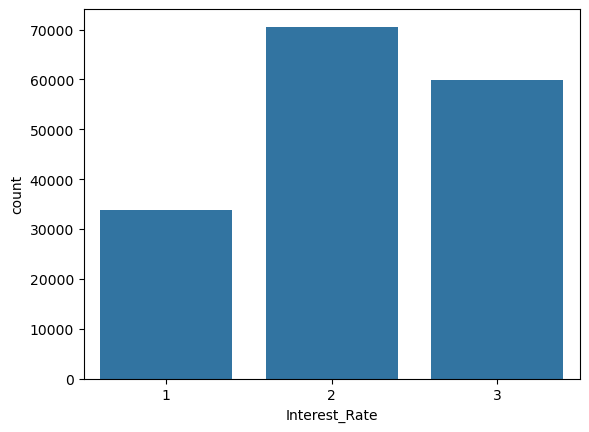

In [75]:
#Verificar si hay una proporción equilibrada entre los diferentes valores de la variable objetivo para un buen modelado posterior
sns.countplot(x='Interest_Rate',data=df)

(10.0, 0.0)

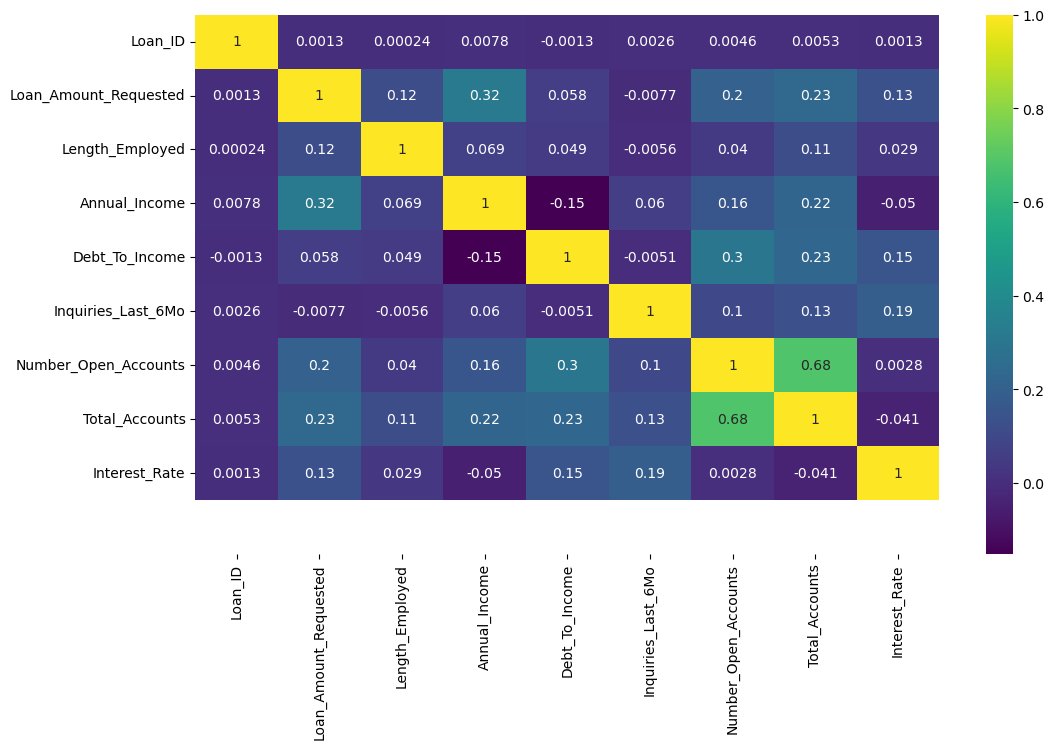

In [77]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only = True),annot=True,cmap='viridis')
plt.ylim(10, 0)

In [79]:
df.corr(numeric_only = True)['Interest_Rate'].sort_values()

Annual_Income           -0.050086
Total_Accounts          -0.040741
Loan_ID                  0.001289
Number_Open_Accounts     0.002849
Length_Employed          0.029096
Loan_Amount_Requested    0.132479
Debt_To_Income           0.152470
Inquiries_Last_6Mo       0.188993
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

<Axes: >

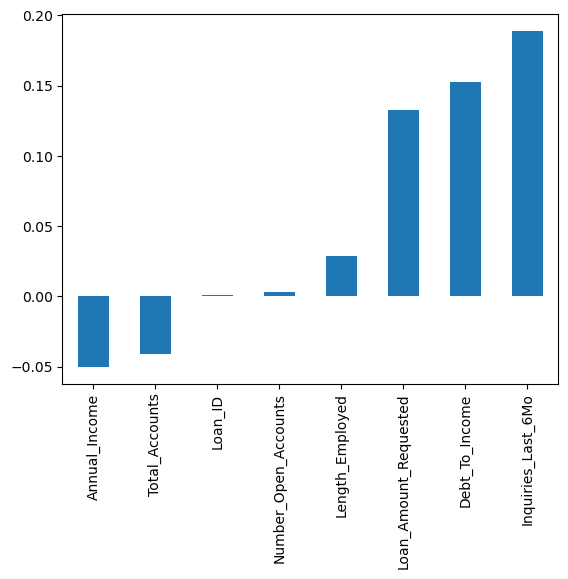

In [80]:
df.corr(numeric_only = True)['Interest_Rate'][:-1].sort_values().plot(kind='bar') #Quitamos la propia variable objetivo

<Axes: xlabel='Interest_Rate', ylabel='Inquiries_Last_6Mo'>

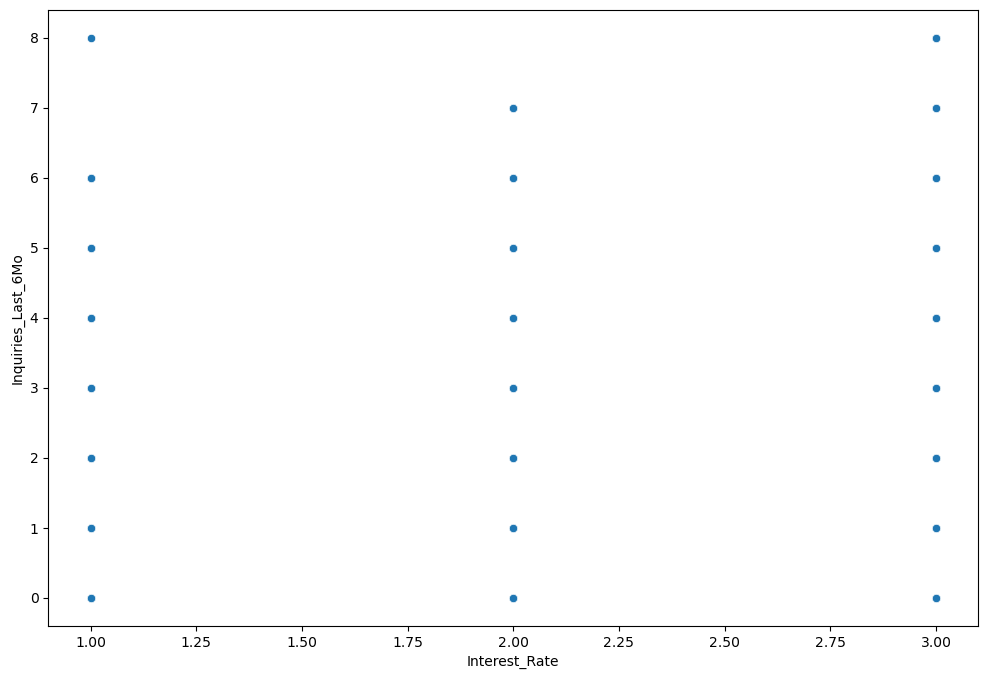

In [81]:
#Visualizar variables altamente correladas con la salida
plt.figure(figsize=(12,8))
sns.scatterplot(x='Interest_Rate',y='Inquiries_Last_6Mo',data=df)

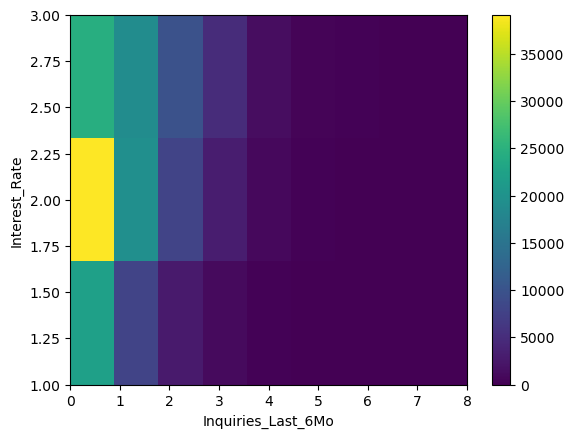

In [82]:
#Si los valores están normalizados, lo mejor es visualizar un histograma 2D
plt.hist2d(df["Inquiries_Last_6Mo"],df["Interest_Rate"],bins=(9,3),cmap=plt.cm.viridis)
plt.xlabel('Inquiries_Last_6Mo')
plt.ylabel('Interest_Rate')
plt.colorbar()

### 3.2.2 Plot geográficos

In [48]:
# Visualizar la información geográfica si estuviera completa, el ejemplo que hay a continuación proviende de una 
# fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='long',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='price',y='lat',data=df)
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',data=df,hue='price') #Representación con poco rango dinámico de colores debido a los outliers
#len(df)*(0.01) #número de muestras que sería el 1% de nuestros datos
#non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:] #estaríamos quitando el 1% de valores outliers
#plt.figure(figsize=(12,8))
#sns.scatterplot(x='long',y='lat',
#                data=non_top_1_perc,hue='price',
#                palette='RdYlGn',edgecolor=None,alpha=0.2) 

### 3.2.3 Otras variables

<Axes: xlabel='Gender'>

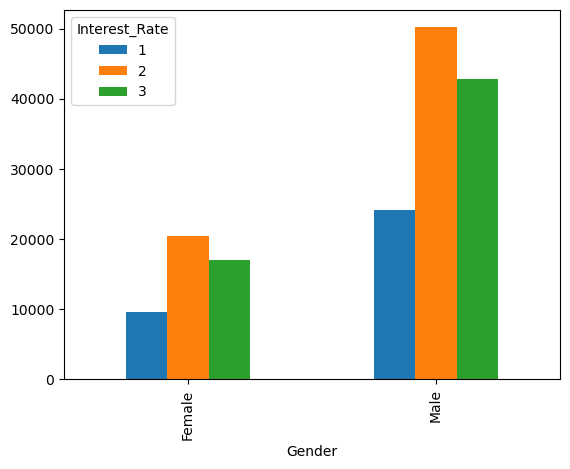

In [83]:
#¿Existe alguna diferencia de comportamiento entre hombre y mujer?
df.pivot_table(index="Gender", columns="Interest_Rate", values="Loan_ID", aggfunc="count").plot(kind="bar")

<Axes: xlabel='Purpose_Of_Loan'>

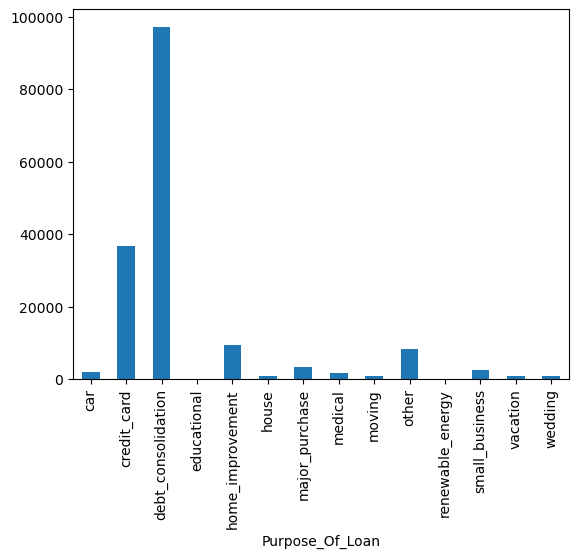

In [84]:
#¿Están enfocados los préstamos en alguna categoría concreta de objetivo del préstamo?
df.groupby("Purpose_Of_Loan").agg("count")["Interest_Rate"].plot(kind="bar")

## 3.3 Limpieza final

In [85]:
# Objetivo: Eliminar variables que no tienen ninguna relación con la variable objetivo (precio) 
# o bien su información ya está incluida en otras variables - Aprovechar conocimiento del campo que estamos tratando

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164308 entries, 0 to 164308
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Loan_ID                164308 non-null  int64  
 1   Loan_Amount_Requested  164308 non-null  int64  
 2   Length_Employed        164308 non-null  float64
 3   Home_Owner             164308 non-null  object 
 4   Annual_Income          164308 non-null  float64
 5   Income_Verified        164308 non-null  object 
 6   Purpose_Of_Loan        164308 non-null  object 
 7   Debt_To_Income         164308 non-null  float64
 8   Inquiries_Last_6Mo     164308 non-null  int64  
 9   Number_Open_Accounts   164308 non-null  int64  
 10  Total_Accounts         164308 non-null  int64  
 11  Gender                 164308 non-null  object 
 12  Interest_Rate          164308 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 17.5+ MB


In [87]:
df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,0.0,Rent,68000.00000,not verified,car,18.37,0,9,14,Female,1
1,10000002,30000,4.0,Mortgage,73993.44661,VERIFIED - income,debt_consolidation,14.93,0,12,24,Female,3
2,10000003,24725,7.0,Mortgage,75566.40000,VERIFIED - income source,debt_consolidation,15.88,0,12,16,Male,3
3,10000004,16000,0.0,Rent,56160.00000,VERIFIED - income source,debt_consolidation,14.34,3,16,22,Male,3
4,10000005,17000,8.0,Own,96000.00000,VERIFIED - income source,debt_consolidation,22.17,1,19,30,Female,1


In [89]:
df.corr(numeric_only = True)['Interest_Rate'].sort_values() #Podríamos eliminar "Number_Open_Accounts", correlación muy baja

Annual_Income           -0.050086
Total_Accounts          -0.040741
Loan_ID                  0.001289
Number_Open_Accounts     0.002849
Length_Employed          0.029096
Loan_Amount_Requested    0.132479
Debt_To_Income           0.152470
Inquiries_Last_6Mo       0.188993
Interest_Rate            1.000000
Name: Interest_Rate, dtype: float64

In [90]:
df = df.drop(['Number_Open_Accounts','Loan_ID','Income_Verified'],axis=1)
df.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate
0,7000,0.0,Rent,68000.00000,car,18.37,0,14,Female,1
1,30000,4.0,Mortgage,73993.44661,debt_consolidation,14.93,0,24,Female,3
2,24725,7.0,Mortgage,75566.40000,debt_consolidation,15.88,0,16,Male,3
3,16000,0.0,Rent,56160.00000,debt_consolidation,14.34,3,22,Male,3
4,17000,8.0,Own,96000.00000,debt_consolidation,22.17,1,30,Female,1


### 3.3.2 Limpieza temporal

In [56]:
#Importante visualizar la evolución temporal (si ha habido un importante cambio, quedarse con 
#la porción de datos que corresponde a la situación actual para mejorar la futura predicción)
#El ejemplo que hay a continuación proviende de una fuente de datos alternativa: https://www.kaggle.com/harlfoxem/housesalesprediction

#df['date'] = pd.to_datetime(df['date'])

#df['month'] = df['date'].apply(lambda date:date.month)

#df['year'] = df['date'].apply(lambda date:date.year)

#sns.boxplot(x='year',y='price',data=df)

#sns.boxplot(x='month',y='price',data=df)

#df.groupby('month').mean()['price'].plot()

#df.groupby('year').mean()['price'].plot()

#df = df.drop('date',axis=1) #La fecha no será una variable útil para el modelo

#df['sqft_basement'].value_counts()

### 3.3.3 Transformación variables categóricas

In [91]:
df.head()

,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate
0,7000,0.0,Rent,68000.00000,car,18.37,0,14,Female,1
1,30000,4.0,Mortgage,73993.44661,debt_consolidation,14.93,0,24,Female,3
2,24725,7.0,Mortgage,75566.40000,debt_consolidation,15.88,0,16,Male,3
3,16000,0.0,Rent,56160.00000,debt_consolidation,14.34,3,22,Male,3
4,17000,8.0,Own,96000.00000,debt_consolidation,22.17,1,30,Female,1


In [92]:
df['Home_Owner'].value_counts() # Pensar si merece la pena realizar algún filtrado de datos si alguna categoría tiene un contador muy bajo y así ahorramos columnas dummy

Home_Owner
Mortgage    86381
Rent        65353
Own         12525
Other          49
Name: count, dtype: int64

In [93]:
df['Purpose_Of_Loan'].value_counts()

Purpose_Of_Loan
debt_consolidation    97101
credit_card           36684
home_improvement       9268
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: count, dtype: int64

In [94]:
df['Gender'].value_counts()

Gender
Male      117175
Female     47133
Name: count, dtype: int64

In [95]:
#Transformar 'Home_Owner'
dummies = pd.get_dummies(df[['Home_Owner', 'Purpose_Of_Loan','Gender']]) #se puede añadir drop_first=True evita redundancia y evita crear una columna por cada variable
df_post = pd.concat([df,dummies],axis=1)
df_post = df_post.drop(['Home_Owner', 'Purpose_Of_Loan','Gender'],axis=1) #Eliminamos las columnas originales

In [96]:
df_post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164308 entries, 0 to 164308
Data columns (total 27 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Loan_Amount_Requested               164308 non-null  int64  
 1   Length_Employed                     164308 non-null  float64
 2   Annual_Income                       164308 non-null  float64
 3   Debt_To_Income                      164308 non-null  float64
 4   Inquiries_Last_6Mo                  164308 non-null  int64  
 5   Total_Accounts                      164308 non-null  int64  
 6   Interest_Rate                       164308 non-null  int64  
 7   Home_Owner_Mortgage                 164308 non-null  bool   
 8   Home_Owner_Other                    164308 non-null  bool   
 9   Home_Owner_Own                      164308 non-null  bool   
 10  Home_Owner_Rent                     164308 non-null  bool   
 11  Purpose_Of_Loan_car            

In [97]:
df_post.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Interest_Rate,Home_Owner_Mortgage,Home_Owner_Other,Home_Owner_Own,...,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding,Gender_Female,Gender_Male
0,7000,0.0,68000.00000,18.37,0,14,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,30000,4.0,73993.44661,14.93,0,24,3,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,24725,7.0,75566.40000,15.88,0,16,3,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,16000,0.0,56160.00000,14.34,3,22,3,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,17000,8.0,96000.00000,22.17,1,30,1,False,False,True,...,False,False,False,False,False,False,False,False,True,False


# 4.Train Test Split

In [98]:
X = df_post.drop('Interest_Rate',axis=1).values

In [99]:
y = df_post['Interest_Rate']

In [100]:
y = pd.get_dummies(y)
# Si la variable objetivo está en formato string, utilizar lo siguiente:
# Primero codificar la variable objetivo como integers y después aplicar one hot encoding
#from keras.utils import np_utils
#from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# encoder.fit(Y)
# Y = encoder.transform(Y)
# Y = np_utils.to_categorical(Y)

In [101]:
y = y.values

In [102]:
y

array([[ True, False, False],
       [False, False,  True],
       [False, False,  True],
       ...,
       [ True, False, False],
       [False, False,  True],
       [False,  True, False]])

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [105]:
X_train.shape

(123231, 26)

In [106]:
X_test.shape

(41077, 26)

# 5.Escalado

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
scaler = MinMaxScaler()

In [109]:
scaler.fit(X_train)

MinMaxScaler()

In [110]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [111]:
X_train.shape

(123231, 26)

In [112]:
X_test.shape

(41077, 26)

In [113]:
X_train

array([[0.27536232, 0.3       , 0.00853789, ..., 0.        , 0.        ,
        1.        ],
       [0.44927536, 0.9       , 0.00693703, ..., 0.        , 0.        ,
        1.        ],
       [0.55072464, 0.1       , 0.00747065, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.01463047, ..., 0.        , 0.        ,
        1.        ],
       [0.28985507, 0.8       , 0.00996868, ..., 0.        , 0.        ,
        1.        ],
       [0.09275362, 0.63988426, 0.00322839, ..., 0.        , 0.        ,
        1.        ]])

In [114]:
X_train.max()

np.float64(1.0)

# 6.Creación del modelo

    # Para un problema de clasificación multiclase
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
                  
    

In [115]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [116]:
X_train.shape

(123231, 26)

In [120]:
model = Sequential()
# Elegir número de capas (layers)
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
num_neuronas_salida = len(df["Interest_Rate"].unique()) # Indicar tantas neuronas de salida como clases a predecir, en este caso 3 (variable "Interest_Rate")

model.add(Dense(units=num_neuronas,activation='relu'))
#model.add(Dropout(0.2)) #la mitad de las neuronas en cada epoch para esta capa. Solo algunas neuronas se actualizarán en cada epoch, permitiendo que solo se ajusten algunos pesos (w) y bias (b) en cada iteración de manera independiente

model.add(Dense(units=np.round(num_neuronas/2).astype(int),activation='relu'))
#model.add(Dropout(0.2)) #la mitad de las neuronas en cada epoch para esta capa

model.add(Dense(units=num_neuronas_salida,activation='softmax')) # softmax para multiclase - softmax activation distribuye la probabilidad sobre cada nodo de salida (clase)

# Para clasificación multiclase "categorical_crossentropy"
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

# 7. Entrenamiento del modelo

In [121]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [122]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.4816 - loss: 1.0074 - val_categorical_accuracy: 0.5209 - val_loss: 0.9638
Epoch 2/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.5180 - loss: 0.9616 - val_categorical_accuracy: 0.5229 - val_loss: 0.9568
Epoch 3/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.5200 - loss: 0.9588 - val_categorical_accuracy: 0.5242 - val_loss: 0.9561
Epoch 4/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.5199 - loss: 0.9575 - val_categorical_accuracy: 0.5236 - val_loss: 0.9560
Epoch 5/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.5204 - loss: 0.9567 - val_categorical_accuracy: 0.5245 - val_loss: 0.9531
Epoch 6/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.5221 - loss: 0.9555 - val_categorical_accuracy: 0.5251 - val_loss: 0.9520
Epoch 7/200
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - categorical_accuracy: 0.522

<Axes: >

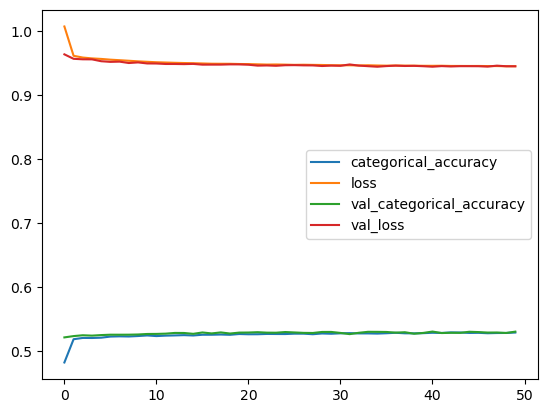

In [124]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# 8. Evaluación del modelo

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

## 8.1 Predicción sobre el conjunto de Test

In [126]:
predictions = model.predict(X_test)

1284/1284 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step


In [127]:
y_test

array([[False, False,  True],
       [ True, False, False],
       [ True, False, False],
       ...,
       [False, False,  True],
       [False,  True, False],
       [ True, False, False]])

In [128]:
predictions

array([[0.05187374, 0.3434693 , 0.60465693],
       [0.2806685 , 0.46815544, 0.251176  ],
       [0.35669613, 0.4718619 , 0.17144193],
       ...,
       [0.22361228, 0.5931301 , 0.18325767],
       [0.12904727, 0.4575725 , 0.41338024],
       [0.35131902, 0.51829076, 0.13039029]], dtype=float32)

In [132]:
#predictions_lab = model.predict_classes(X_test) #Usado en versiones anteriores
predictions_lab = np.argmax(model.predict(X_test), axis=-1) #Si nueva versión de scikit-learn

1284/1284 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step


In [133]:
predictions_lab #La etiqueta 0 es la primera categoría de la variable objetivo (Interest_Rate = 1) y así sucesivamente

array([2, 1, 1, ..., 1, 1, 1])

In [134]:
predictions_lab_real = predictions_lab+1

In [135]:
predictions_lab_real

array([3, 2, 2, ..., 2, 2, 2])

In [136]:
df_test_lab = pd.DataFrame(y_test, columns = ['Interest Rate 1','Interest Rate 2','Interest Rate 3'])

In [137]:
df_test_lab

,Interest Rate 1,Interest Rate 2,Interest Rate 3
0,False,False,True
1,True,False,False
2,True,False,False
3,False,False,True
4,False,True,False
...,...,...,...
41072,False,True,False
41073,False,False,True
41074,False,False,True
41075,False,True,False


In [138]:
df_test_lab["Clase Real"]=np.where(df_test_lab["Interest Rate 1"]==1,1,np.where(df_test_lab["Interest Rate 2"]==1,2,3))

In [139]:
df_test_lab["Clase Real"]

0        3
1        1
2        1
3        3
4        2
        ..
41072    2
41073    3
41074    3
41075    2
41076    1
Name: Clase Real, Length: 41077, dtype: int64

In [140]:
clases=[1, 2, 3]

In [141]:
array_clase_real = df_test_lab["Clase Real"].to_numpy()

In [142]:
confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)

array([[ 1422,  5791,  1132],
       [ 1199, 12239,  4204],
       [  289,  6697,  8104]])

In [143]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: https://datascience.stackexchange.com/questions/40067/confusion-matrix-three-classes-python/40068
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix sin normalizar')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix sin normalizar
[[ 1422  5791  1132]
 [ 1199 12239  4204]
 [  289  6697  8104]]


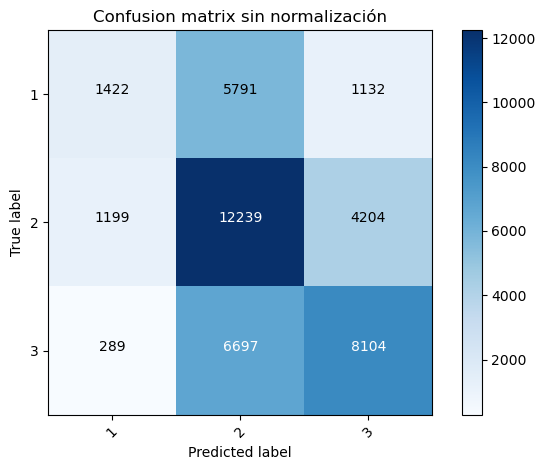

In [144]:
cnf_matrix = confusion_matrix(array_clase_real, predictions_lab_real, labels=clases)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clases,
                      title='Confusion matrix sin normalización')

## 8.2 Predicción sobre nuevos datos

In [149]:
#Lectura datos a predecir
df_pred = pd.read_excel('./info_prestamos - predecir.xlsx',sheet_name="info_prestamos - predecir")
df_pred = df_pred[df.columns] #Filtramos el dataframe predicción para quedarnos con las mismas columnas de interés que el df histórico
#Transformación
df_pred['Length_Employed'] = df_pred['Length_Employed'].str.replace('< 1 year','0 years') #Sustituimos <1 año por 0 para diferenciar de la categoría 1 año
df_pred['Length_Employed'] = df_pred["Length_Employed"].str.extract('(\d+)') # Nos quedamos únicamente con los carácteres numéricos
df_pred["Length_Employed"] = df_pred["Length_Employed"].apply(pd.to_numeric) # Convertimos la columna a formato número
df_pred['Length_Employed'] = df_pred.apply(lambda x: completar_len_empl(x['Total_Accounts'], x['Length_Employed']), axis=1)
#Añadimos columnas dummy - EN LOS DATOS DE ENTRADA DEBEN ESTAR TODAS LAS POSIBLES CATEGORÍAS PARA QUE SE CREEN EL MISMO NÚMERO DE COLUMNAS DUMMY Y SIRVA EL MODELO CREADO
dummies_pred = pd.get_dummies(df_pred[['Home_Owner', 'Purpose_Of_Loan','Gender']]) #se puede añadir drop_first=True evita redundancia y evita crear una columna por cada variable
df_post_pred = pd.concat([df_pred,dummies_pred],axis=1)
df_post_pred = df_post_pred.drop(['Home_Owner', 'Purpose_Of_Loan','Gender'],axis=1) #Eliminamos las columnas originales
X_pred = df_post_pred.drop('Interest_Rate',axis=1)
X_pred = scaler.transform(X_pred)
#Realizamos predicción
resultado = np.argmax(model.predict(X_test), axis=-1)+1 #Si nueva versión de scikit-learn
#resultado = model.predict_classes(X_pred)+1 #Versiones previas
#Unimos en un dataframe los datos a predecir con su predicción
df_pred['PREDICCIÓN']=pd.DataFrame(resultado)
df_pred

 315/1284 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step

C:\Users\Iván Pinar\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


1284/1284 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step


,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Total_Accounts,Gender,Interest_Rate,PREDICCIÓN
0,7.000,0,Rent,55000.0,car,18.37,0,14,Female,1,3
1,30.000,4,Mortgage,40000.0,debt_consolidation,14.93,0,24,Female,3,2
2,24.725,7,Mortgage,75566.4,debt_consolidation,15.88,0,16,Male,3,2
3,16.000,0,Mortgage,56160.0,debt_consolidation,14.34,3,22,Male,3,3
4,17.000,8,Own,96000.0,debt_consolidation,22.17,1,30,Female,1,2
5,4.500,2,Rent,30000.0,credit_card,10.88,1,15,Male,3,1
6,18.075,4,Rent,85000.0,debt_consolidation,5.65,0,12,Male,3,2
7,15.000,0,Rent,115000.0,debt_consolidation,7.97,1,31,Female,2,3
8,6.300,10,Rent,125000.0,debt_consolidation,16.12,3,9,Female,3,3
9,30.000,10,Own,163000.0,debt_consolidation,11.13,0,43,Male,1,2


In [150]:
#Guardar y cargar el modelo para posterior uso
from tensorflow.keras.models import load_model
model.save('modelo_pred_prestamo.keras')

# 9.Monitorización con Tensorboard

In [151]:
#Más información: https://www.tensorflow.org/tensorboard/

In [152]:
from tensorflow.keras.callbacks import TensorBoard

In [153]:
# WINDOWS: Usar "logs\\fit"
# MACOS/LINUX: Usar "logs\fit"

log_directory = 'logs\\fit'

# OPCIONAL: Añadir TIMESTAMP para tener una carpeta única
#from datetime import datetime
#timestamp = datetime.now().strftime("%Y-%m-%d--%H%M")
#log_directory = log_directory + '\\' + timestamp


board = TensorBoard(log_dir=log_directory,histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

## 9.1 Entrenamiento del modelo

In [154]:
model = Sequential()
# Elegir número de capas (layers)
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
num_neuronas = X_train.shape[1]
num_neuronas_salida = len(df["Interest_Rate"].unique()) # Indicar tantas neuronas de salida como clases a predecir, en este caso 3 (variable "Interest_Rate")

model.add(Dense(units=num_neuronas,activation='relu'))
#model.add(Dropout(0.2)) #la mitad de las neuronas en cada epoch para esta capa. Solo algunas neuronas se actualizarán en cada epoch, permitiendo que solo se ajusten algunos pesos (w) y bias (b) en cada iteración de manera independiente

model.add(Dense(units=np.round(num_neuronas/2),activation='relu'))
#model.add(Dropout(0.2)) #la mitad de las neuronas en cada epoch para esta capa

model.add(Dense(units=num_neuronas_salida,activation='softmax')) # softmax para multiclase - softmax activation distribuye la probabilidad sobre cada nodo de salida (clase)

# Para clasificación binaria "binary_crossentropy"
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['categorical_accuracy'])

In [156]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size=256,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, board] #Añadimos el callback para monitorizar con tensorboard
          )

UnknownError: Failed to rename: logs\fit\train\checkpoint.tmpe4c86c28a1d64c9fb3837950284aaee5 to: logs\fit\train\checkpoint : Acceso denegado.
; Input/output error

## 9.2 Ejecutar Tensorboard

Tensorboard estará operativa localmente en http://localhost:6006/

In [94]:
pwd

'C:\\Users\\ivan_pinar\\Dropbox\\Creación de MOCs\\MOC Deep Learning\\Scripts\\ANN Clasificación Multiclase'

In [ ]:
Abrir cmd y dirigirse con cd hasta la ruta del fichero py (pwd) después ejecutar en cmd: tensorboard --logdir logs\fit 